# Nonlinear Regression

## Fitting a curve to data when the curve does not depend linearly on the unknown paramers

## Example: hill function 

## $$f(x) = \dfrac{x^n}{a+x^n}$$

In [1]:
f=function(x,a=1,n=1){
    (x^n)/(a+x^n)
}

# Generate Target Curve

In [22]:
xplot=seq(0,5,by=0.01)
n.target=2.5
a.target=1.25
yplot=f(xplot,a.target,n.target)

## Generate Random Data about Target

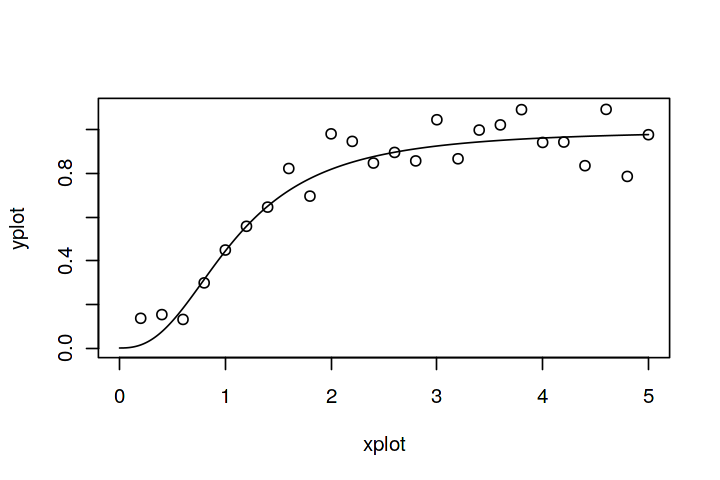

In [24]:
x=seq(0,5,by=0.2)
n=length(x)
y=f(x, a.target, n.target )+rnorm(n,0,.1)

options(repr.plot.width=6, repr.plot.height=4)
plot(xplot,yplot,type="l", ylim=c(0,1.1))
points(x,y)

# Fit the nonliner model

In [15]:
model=nls(y ~ x^n/(a+x^n),start=list(a=1,n=1))

In [16]:
model

Nonlinear regression model
  model: y ~ x^n/(a + x^n)
   data: parent.frame()
     a      n 
0.8887 2.3743 
 residual sum-of-squares: 0.1835

Number of iterations to convergence: 8 
Achieved convergence tolerance: 5.067e-06

In [17]:
summary(model)


Formula: y ~ x^n/(a + x^n)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a   0.8887     0.1355   6.560 8.75e-07 ***
n   2.3743     0.2996   7.925 3.72e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08745 on 24 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 5.067e-06


In [18]:
parameters=summary(model)$param
print(parameters)
a.fit=parameters[1]
n.fit=parameters[2]
print(c(a.fit,n.fit))

   Estimate Std. Error  t value     Pr(>|t|)
a 0.8887127  0.1354830 6.559590 8.752050e-07
n 2.3743297  0.2995851 7.925394 3.723794e-08
[1] 0.8887127 2.3743297


In [19]:
prediction=f(x,a.fit,n.fit)

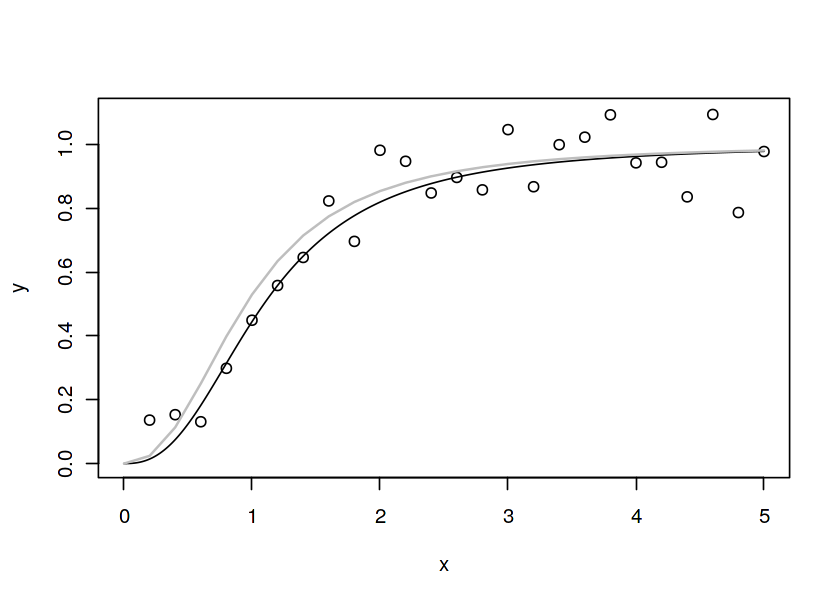

In [27]:
options(repr.plot.width=7, repr.plot.height=5)
#pdf("hill-fit-nls.pdf",width=7,height=4)
plot(xplot, yplot,type="l", ylab="y",xlab="x", ylim=c(0,1.1))
points(x,y)
lines(x, prediction, lwd="1.5",col="gray")
#dev.off()